In [64]:
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.preprocessing import StandardScaler

nrem_dataframe = pd.read_csv('nrem_dataframe.csv') # previously saved dataset
mat_contents = sio.loadmat('spectral_slope_output.mat')


In [4]:
# rsync -n -avP --exclude "cleaning-sa" . tvanasse@tononi-1:/data/tvanasse/nccam3

In [65]:
nrem_dataframe["SPECEXP_1-20_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_1-20"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_1-20_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["FREQ_1-20"] = np.array(0).astype('object') #create object for

nrem_dataframe["SPECEXP_20-40_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_20-40"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_20-40_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["FREQ_20-40"] = np.array(0).astype('object') #create object for 

nrem_dataframe["SPECEXP_1-40_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_1-40"] = np.array(0).astype('object') #create object for 
nrem_dataframe["OBS_1-40_ALL"] = np.array(0).astype('object') #create object for 
nrem_dataframe["FREQ_1-40"] = np.array(0).astype('object') #create object for 

# get spectral exponents & set timerange (1 or 2 minutes before awakening)
timerange = 1 # minutes before awakening
for i in range(0,mat_contents['output']['intSlo0'].shape[1]):
    
    if (str(np.squeeze(mat_contents['output']['freqrange'][0][i])) == "[ 1 20]") & (mat_contents['output']['timerange'][0][i] == timerange):
        nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values,"SPECEXP_1-20"] = np.squeeze(mat_contents['output']['meanspectralexp'][0][i])
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"SPECEXP_1-20_ALL"] = np.squeeze(mat_contents['output']['spectralexp_all'][0][i]).tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_1-20"]= np.squeeze(mat_contents['output']['obs_freq_avg'][0][i]).tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_1-20_ALL"]= np.squeeze(mat_contents['output']['obs_freq_all'][0][i]).tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"FREQ_1-20"] = np.squeeze(mat_contents['output']['Pows'][0][i]['frex'][0][0][0]).tolist()
    
    elif (str(np.squeeze(mat_contents['output']['freqrange'][0][i])) == "[20 40]") & (mat_contents['output']['timerange'][0][i] == timerange):
        nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values,"SPECEXP_20-40"] = np.squeeze(mat_contents['output']['meanspectralexp'][0][i])
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"SPECEXP_20-40_ALL"] = np.squeeze(mat_contents['output']['spectralexp_all'][0][i]).tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_20-40"] = np.squeeze(mat_contents['output']['obs_freq_avg'][0][i]).tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_20-40_ALL"]= np.squeeze(mat_contents['output']['obs_freq_all'][0][i]).tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"FREQ_20-40"] = np.squeeze(mat_contents['output']['Pows'][0][i]['frex'][0][0][0]).tolist()
    
    elif (str(np.squeeze(mat_contents['output']['freqrange'][0][i])) == "[ 1 40]") & (mat_contents['output']['timerange'][0][i] == timerange):
        nrem_dataframe.loc[nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values,"SPECEXP_1-40"] = np.squeeze(mat_contents['output']['meanspectralexp'][0][i])
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"SPECEXP_1-40_ALL"] = np.squeeze(mat_contents['output']['spectralexp_all'][0][i]).tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_1-40"] = np.squeeze(mat_contents['output']['obs_freq_avg'][0][i]).tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"OBS_1-40_ALL"]= np.squeeze(mat_contents['output']['obs_freq_all'][0][i]).tolist()
        nrem_dataframe.at[int(nrem_dataframe[nrem_dataframe["PATH"] == mat_contents['output']['path'][0][i][0][0][0]].index.values),"FREQ_1-40"] = np.squeeze(mat_contents['output']['Pows'][0][i]['frex'][0][0][0]).tolist()
    

### Remove held out data

In [66]:
nrem_dataframe = nrem_dataframe[(nrem_dataframe["HOLD_OUT"] == False) &
                                (nrem_dataframe["scoring_match"] == 1) &
                                (nrem_dataframe["FREQ_1-20"] != 0)].copy()

nrem_dataframe = nrem_dataframe.reset_index(drop=True)

nrem_dataframe["REPORT_BINARY"] = 0
nrem_dataframe.loc[nrem_dataframe[(nrem_dataframe["Q1Experience"] != "NoReport")].index,"REPORT_BINARY"] = 1

nrem_dataframe

,ID,Visit,SA,Date_Time,Date,Time,Stage,Q1ExperienceNum,Q1Experience,Q1Report,...,OBS_1-40,OBS_1-40_ALL,FREQ_1-40,SPECEXP_20-40,SPECEXP_1-20,SPECEXP_1-40,SPECEXP_1-20_ALL,SPECEXP_20-40_ALL,SPECEXP_1-40_ALL,REPORT_BINARY
0,2000,1,7,11/19/0014 05:08,NaN,5:08 AM,2.0,3.0,Report,walking,...,"[5.696197213430894, 5.679567658666815, 5.66345...","[[3.704184713461314, 3.7270624325263153, 3.750...","[0.9765625, 0.9878549542252945, 0.999277988441...",-2.954224,-1.573230,-1.860341,"[-1.571483635805873, -1.4203087750917003, -1.4...","[-2.9931281539814245, -2.9237296130755377, -2....","[-1.8529798788717706, -1.7091305055270274, -1....",1
1,2000,1,1,11/19/0014 01:00,NaN,1:00 AM,2.0,3.0,Report,Food or herbal supplements,...,"[23.660024926257627, 23.310375267087217, 22.96...","[[36.98151111966809, 36.51363829129137, 36.051...","[0.9765625, 0.9878549542252945, 0.999277988441...",-2.719230,-1.936518,-2.209506,"[-2.229467017073181, -2.059363211688192, -1.90...","[-2.8025109132254182, -2.61114860609501, -2.54...","[-2.4116323772243855, -2.2726685305379117, -2....",1
2,2000,1,4,11/19/0014 03:15,NaN,3:15 AM,2.0,1.0,NoReport,NaN,...,"[67.91124775454011, 66.56467146570533, 65.2462...","[[56.14164364175944, 55.29265988552885, 54.456...","[0.9765625, 0.9878549542252945, 0.999277988441...",-2.282373,-2.530979,-2.594719,"[-2.5953849075035036, -2.5991439517645363, -2....","[-2.1097403031445316, -2.0466995720170775, -2....","[-2.6440771794142317, -2.5994254906302063, -2....",0
3,2000,1,2,11/19/0014 01:38,NaN,1:38 AM,2.0,3.0,Report,Was trying to recall the previous dream,...,"[11.380178288387295, 11.268643343956189, 11.15...","[[9.052729255704106, 8.982391632884974, 8.9126...","[0.9765625, 0.9878549542252945, 0.999277988441...",-3.158741,-1.594458,-1.967341,"[-1.5702280679849523, -1.4528125943636283, -1....","[-3.068523866475032, -3.050306796991774, -3.24...","[-1.9706877070701434, -1.8191425819936935, -1....",1
4,2000,1,9,11/19/0014 06:07,NaN,6:07 AM,NaN,3.0,Report,Drive in a car with a friend going to the bank...,...,"[3.4419489740221914, 3.416753660222528, 3.3918...","[[3.667472553075757, 3.6529314623592204, 3.638...","[0.9765625, 0.9878549542252945, 0.999277988441...",-2.801851,-1.452406,-1.629988,"[-1.5608628266738405, -1.5607180658987354, -1....","[-2.9958587824955494, -3.0596245392218884, -2....","[-1.6877444376091297, -1.6605541303392741, -1....",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,2035,2,2,10/21/0015 01:19,NaN,1:19 AM,2.0,1.0,NoReport,NaN,...,"[27.906487675489885, 27.378018544617767, 26.86...","[[32.315144689495476, 31.830590287314102, 31.3...","[0.9765625, 0.9878549542252945, 0.999277988441...",-2.183731,-1.797698,-2.121547,"[-1.9039338373927897, -1.7646952555288051, -1....","[-2.2562906722810157, -2.2640324030885663, -2....","[-2.2795954220286956, -2.172355130495217, -2.0...",0
161,2035,2,5,10/21/0015 05:10,NaN,5:10 AM,2.0,2.0,Something,NaN,...,"[12.271395779219642, 11.977082880060793, 11.69...","[[18.228674322466222, 17.69974338275549, 17.18...","[0.9765625, 0.9878549542252945, 0.999277988441...",-2.749911,-1.503441,-1.769291,"[-1.691608168235824, -1.574385921742353, -1.35...","[-2.998174209585914, -3.085397943705447, -2.88...","[-1.9091880731316273, -1.7974592441641457, -1....",1
162,2035,2,3,10/21/0015 01:42,NaN,1:42 AM,2.0,2.0,Something,"I was going over some figures (numbers, I think)",...,"[22.84094494965168, 22.505139173259916, 22.174...","[[26.335260989562315, 26.081465065798376, 25.8...","[0.9765625, 0.9878549542252945, 0.999277988441...",-2.685635,-1.713314,-2.091080,"[-1.8411365287907377, -1.7026355096025092, -1....","[-2.3652772787083647, -2.8610372795441044, -2....","[-2.2359240135433236, -2.121469287841558, -1.9...",1
163,2037,3,7,05/05/0016 03:28,NaN,3:28 AM,2.0,3.0,Report,Watching,...,"[2.667985646691656, 2.6454860807403815, 2.6232...","[[3.0018368378428724, 2.9845592683898117, 2.96...","[0.9765625, 0.9878549542252945, 0.999277988441...",-2.862096,-1.295573,-1.322953,"[-1.3736

### Spectral Exponent (1-40) x 185 channels as feature matrix

In [67]:
# (n_samples, n_features) 
features = np.vstack(nrem_dataframe["SPECEXP_1-20_ALL"].values)
print("features: " + str(features.shape))

y = nrem_dataframe["REPORT_BINARY"].values
print("y: " + str(y.shape))

groups = nrem_dataframe["ID"].values
print("groups: " + str(groups.shape))

features: (165, 185)
y: (165,)
groups: (165,)


In [68]:
# from sklearn import preprocessing
# features = preprocessing.scale(features)

In [69]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
from sklearn import svm 


n_splits = 5
n_jobs = 1

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

cv_object = cross_validate(clf, 
                           X=features, 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

print(cv_object)
print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))

GroupKFold(n_splits=5)
{'fit_time': array([0.00410104, 0.00434208, 0.00384808, 0.00372005, 0.004143  ]), 'score_time': array([0.00100899, 0.00091004, 0.00100303, 0.00096202, 0.00101709]), 'test_score': array([0.59423077, 0.55454545, 0.52941176, 0.54166667, 0.55555556])}
Mean Bal. Acc: 0.5550820421408658


Reading /Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2000/eeg/ses-1/awakening-7-cleaned2_nrem.fdt


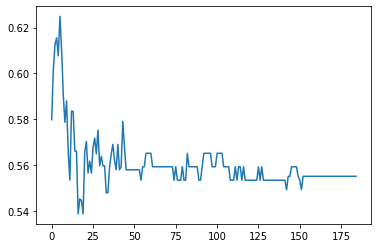

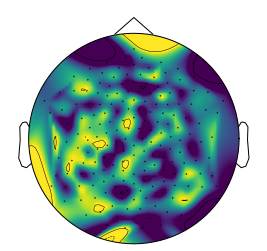

(<matplotlib.image.AxesImage at 0x7fefd1d873d0>,
 <matplotlib.contour.QuadContourSet at 0x7ff0715abf50>)

In [70]:
# rank features
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from matplotlib import cm, colors, colorbar

import mne
raw = mne.io.read_raw_eeglab('/Volumes/NCCAM/NCCAM/NCCAM3/NCCAM3_Workspace_Backup/wDreamReport/aligned/extraction_TJV/cleaning-sa/post_process/../../sub-2000/eeg/ses-1/awakening-7-cleaned2_nrem.set')

from sklearn.feature_selection import RFECV

selector = RFECV(clf, 
                 step=features.shape[1]/features.shape[1], 
                 cv=gkf, 
                 scoring='balanced_accuracy', 
                 verbose=0, 
                 n_jobs=1)
selector = selector.fit(features, y, groups=groups)

plt.plot(selector.grid_scores_)
plt.show()

# Plot the topography of ranking
mne.viz.plot_topomap(selector.ranking_, 
                     raw.info, 
                     vmin=1, 
                     vmax=150, 
                     cmap=cm.viridis_r,)

### Classic frequency band peaks of 185 channels

In [71]:

# get band peaks
features = []
for i in range(0,len(nrem_dataframe["OBS_1-40_ALL"].values)):
    print(i)
#     features.append(np.hstack(nrem_dataframe["OBS_1-40_ALL"].values[i]))
    y = []
    for j in range(0,185):
        
        for f in [[0,4],[4,8],[8,13],[13,30],[30,50]]:
            a = np.where(np.array(nrem_dataframe["FREQ_1-40"][0]) >= f[0])
            b = np.where(np.array(nrem_dataframe["FREQ_1-40"][0]) <= f[1])
            c = np.intersect1d(a,b)
            y.append(np.max(np.array(nrem_dataframe["OBS_1-40_ALL"][i])[j][c]))  
            
    features.append(np.ravel(np.vstack(np.array(y))))
    
features = np.vstack(np.array(features))



print("features: " + str(features.shape))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
features: (165, 925)


In [72]:
from sklearn import preprocessing
features = preprocessing.scale(features)

In [73]:
y = nrem_dataframe["REPORT_BINARY"].values
print("y: " + str(y.shape))

groups = nrem_dataframe["ID"].values
print("groups: " + str(groups.shape))

y: (165,)
groups: (165,)


In [74]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
from sklearn import svm 


n_splits = 5
n_jobs = 1

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

cv_object = cross_validate(clf, 
                           X=features, 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

cv_object

GroupKFold(n_splits=5)


{'fit_time': array([0.02170515, 0.01970005, 0.022686  , 0.01829314, 0.0214479 ]),
 'score_time': array([0.00292587, 0.00280595, 0.00285697, 0.00278282, 0.00334525]),
 'test_score': array([0.52115385, 0.44090909, 0.61764706, 0.38888889, 0.625     ])}

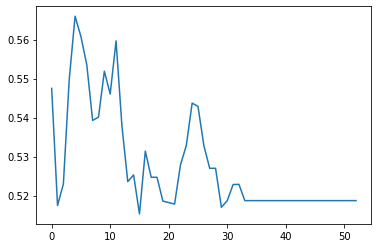

In [76]:
# rank features
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from matplotlib import cm, colors, colorbar

from sklearn.feature_selection import RFECV

selector = RFECV(clf, 
                 step=features.shape[1]/50, 
                 cv=gkf, 
                 scoring='balanced_accuracy', 
                 verbose=0, 
                 n_jobs=1)
selector = selector.fit(features, y, groups=groups)

plt.plot(selector.grid_scores_)
plt.show()

In [77]:
channel_sum_ranking = []
for i in range(0,925,5):
    channel_sum_ranking.append(np.sum(selector.ranking_[i:i+5]))

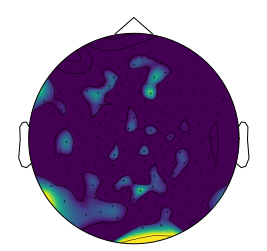

(<matplotlib.image.AxesImage at 0x7fefca795cd0>,
 <matplotlib.contour.QuadContourSet at 0x7fefb0b49110>)

In [78]:
# Plot the topography of ranking
mne.viz.plot_topomap(np.array(channel_sum_ranking), 
                     raw.info, 
                     vmin=1, 
                     vmax=100, 
                     cmap=cm.viridis_r,)

### PSD of 185 channels--324 bins--as feature matrix

In [79]:
features = []
for i in range(0,len(nrem_dataframe["OBS_1-40_ALL"].values)):
    features.append(np.hstack(nrem_dataframe["OBS_1-40_ALL"].values[i]))
features = np.vstack(np.array(features))

print("features: " + str(features.shape))

y = nrem_dataframe["REPORT_BINARY"].values
print("y: " + str(y.shape))

groups = nrem_dataframe["ID"].values
print("groups: " + str(groups.shape))

features: (165, 59940)
y: (165,)
groups: (165,)


In [80]:
from sklearn import preprocessing
features = preprocessing.scale(features) # standardize each feature

In [81]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
from sklearn import svm 


n_splits = 5
n_jobs = 1

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

cv_object = cross_validate(clf, 
                           X=features, 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

cv_object



GroupKFold(n_splits=5)


{'fit_time': array([1.12564826, 1.08961606, 1.08331275, 1.06147695, 1.06406403]),
 'score_time': array([0.19180393, 0.20733905, 0.21774006, 0.20508909, 0.20670581]),
 'test_score': array([0.50769231, 0.58636364, 0.58823529, 0.43055556, 0.68055556])}

In [82]:
from sklearn.feature_selection import RFECV

selector = RFECV(clf, 
                 step=features.shape[1]/20, 
                 cv=gkf, 
                 scoring='balanced_accuracy', 
                 verbose=0, 
                 n_jobs=1)
selector = selector.fit(features, y, groups=groups)

plt.plot(selector.grid_scores_)

KeyboardInterrupt: 

In [ ]:
plt.plot(selector.grid_scores_)

In [ ]:
selector.ranking_

In [ ]:
channel_sum_ranking = []
for i in range(0,59940,324):
    channel_sum_ranking.append(np.sum(selector.ranking_[i:i+324]))

In [ ]:
# Plot the topography of ranking
mne.viz.plot_topomap(np.array(channel_sum_ranking), 
                     raw.info, 
#                      vmin=1, 
#                      vmax=2, 
                     cmap=cm.viridis_r,)

### PSD of 185 channels--324 bins--as feature matrix (PCA REDUCED)

In [83]:
from sklearn.decomposition import PCA

In [84]:
features = []
for i in range(0,len(nrem_dataframe["OBS_1-40_ALL"].values)):
    features.append(np.hstack(nrem_dataframe["OBS_1-40_ALL"].values[i]))
features = np.vstack(np.array(features))

print("features: " + str(features.shape))

y = nrem_dataframe["REPORT_BINARY"].values
print("y: " + str(y.shape))

groups = nrem_dataframe["ID"].values
print("groups: " + str(groups.shape))

pca = PCA(n_components=20)
features_r = pca.fit(features).transform(features)
print("features (PCA reduced): " + str(features_r.shape))

features: (165, 59940)
y: (165,)
groups: (165,)
features (PCA reduced): (165, 20)


In [85]:
from sklearn import preprocessing
features_r = preprocessing.scale(features_r) # standardize each feature

from sklearn.model_selection import GroupKFold
from sklearn.model_selection import cross_validate
from sklearn import svm 


n_splits = 5
n_jobs = 1

# create group k fold with n splits
gkf = GroupKFold(n_splits=n_splits)
print(gkf)

clf = svm.SVC(kernel='linear',
              class_weight='balanced'
             )

cv_object = cross_validate(clf, 
                           X=features_r, 
                           y=y,
                           cv=gkf,
                           n_jobs=n_jobs,
                           groups=groups,
                           scoring='balanced_accuracy')

print(cv_object)
print("Mean Bal. Acc: " + str(np.mean(cv_object['test_score'])))

GroupKFold(n_splits=5)
{'fit_time': array([0.00234008, 0.00127006, 0.0013268 , 0.00579023, 0.00275016]), 'score_time': array([0.00064111, 0.00050497, 0.00049829, 0.00053406, 0.00055575]), 'test_score': array([0.59230769, 0.56363636, 0.55882353, 0.40972222, 0.61805556])}
Mean Bal. Acc: 0.5485090726267197


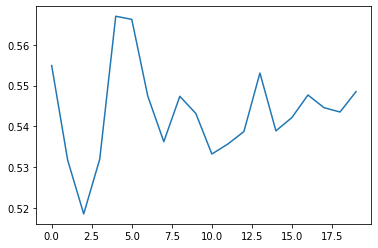

In [86]:
from sklearn.feature_selection import RFECV

selector = RFECV(clf, 
                 step=features_r.shape[1]/20, 
                 cv=gkf, 
                 scoring='balanced_accuracy', 
                 verbose=0, 
                 n_jobs=1)
selector = selector.fit(features_r, y, groups=groups)

plt.plot(selector.grid_scores_)

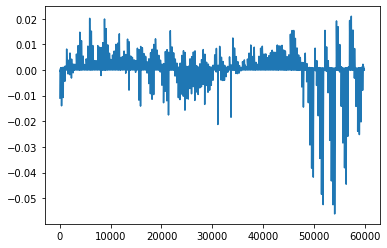

In [87]:
plt.plot(pca.components_[1])

component weights, channel sum: 0
feature ranking: 1


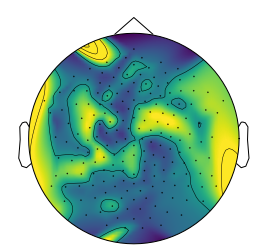

component weights, channel sum: 1
feature ranking: 13


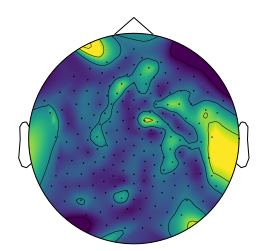

component weights, channel sum: 2
feature ranking: 1


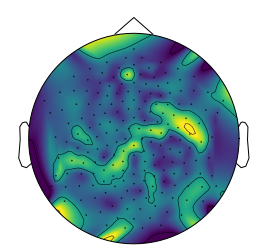

component weights, channel sum: 3
feature ranking: 1


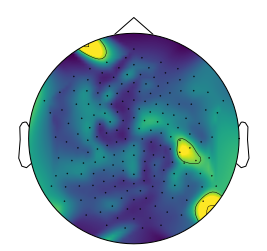

component weights, channel sum: 4
feature ranking: 5


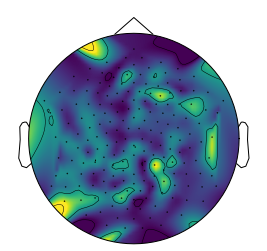

component weights, channel sum: 5
feature ranking: 6


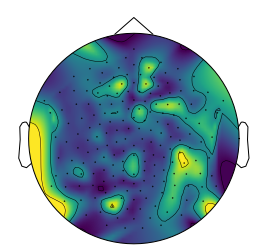

component weights, channel sum: 6
feature ranking: 1


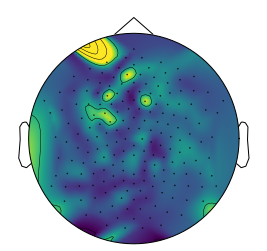

component weights, channel sum: 7
feature ranking: 8


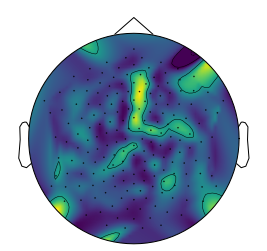

component weights, channel sum: 8
feature ranking: 15


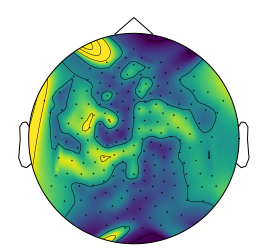

component weights, channel sum: 9
feature ranking: 7


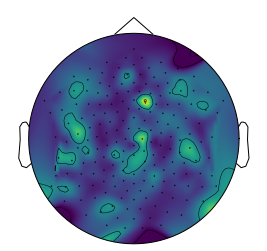

component weights, channel sum: 10
feature ranking: 12


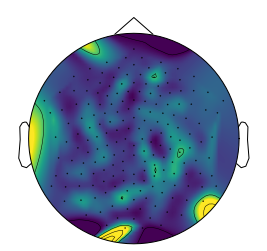

component weights, channel sum: 11
feature ranking: 10


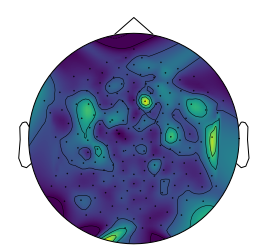

component weights, channel sum: 12
feature ranking: 14


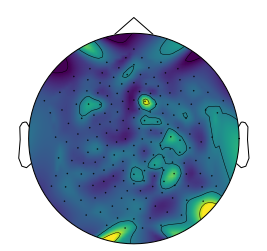

component weights, channel sum: 13
feature ranking: 9


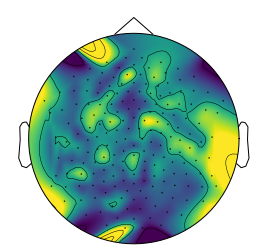

component weights, channel sum: 14
feature ranking: 2


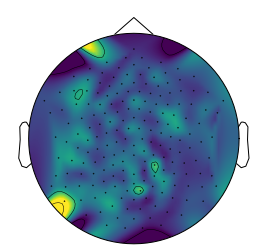

component weights, channel sum: 15
feature ranking: 16


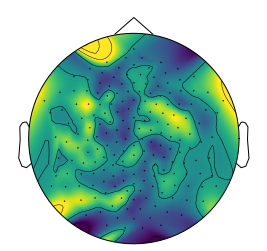

component weights, channel sum: 16
feature ranking: 4


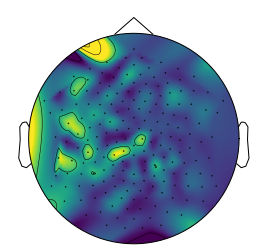

component weights, channel sum: 17
feature ranking: 1


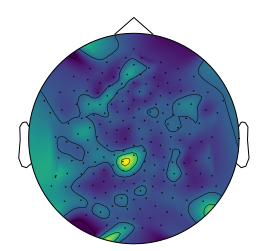

component weights, channel sum: 18
feature ranking: 3


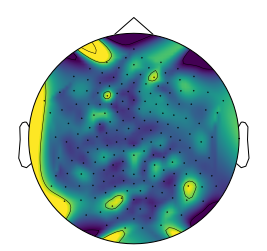

component weights, channel sum: 19
feature ranking: 11


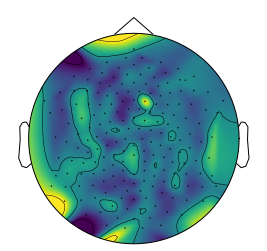

In [88]:
for comp in range(0,20):
    print("component weights, channel sum: " + str(comp))
    print("feature ranking: " + str(selector.ranking_[comp]))
    channel_sum_ranking = []
    for i in range(0,59940,324):
        channel_sum_ranking.append(np.sum(np.absolute(pca.components_[comp][i:i+324])))
    # Plot the topography of ranking
    mne.viz.plot_topomap(np.array(channel_sum_ranking), 
                         raw.info, 
    #                      vmin=1, 
    #                      vmax=2, 
                         cmap=cm.viridis,)
    plt.show()